In [66]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
%matplotlib inline

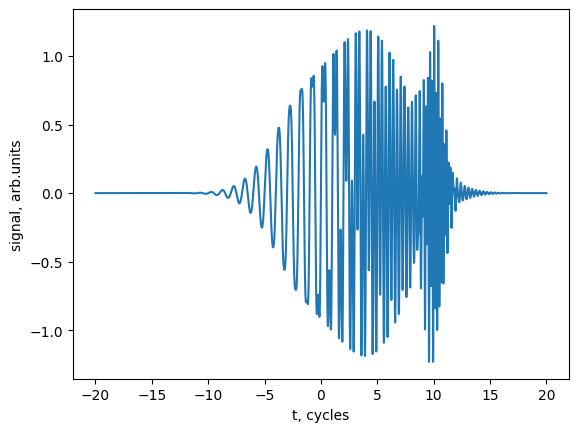

In [53]:
# generate the signal
pi = np.pi
t=np.linspace(-20*2*pi, 20*2*pi, 3**9+6)
y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)

plt.plot(t/2/pi,y)

plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units');

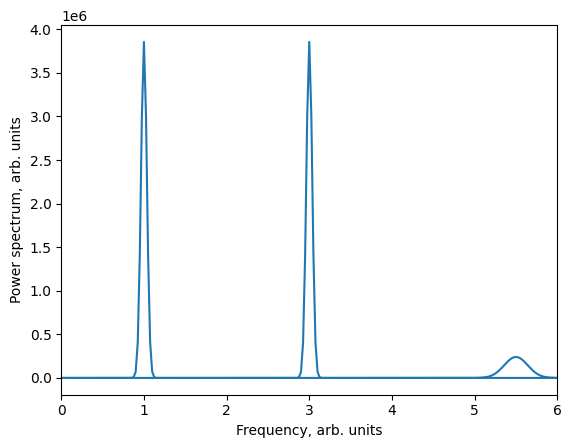

In [54]:
# Fourier spectrum
sp=np.fft.fft(y)
w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plt.plot(w, abs(sp)**2)
plt.xlim(0,6)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units');

In [61]:
# windowed Fourier transform (Gabor transform, spectrogram)
def get_specgram(time, signal, width = 1.5, osc = 20, nwindowsteps=1000):
    
    position = np.linspace(-osc,osc,nwindowsteps)
    specgram = np.empty((len(time),nwindowsteps))
    
    for ind, val in enumerate(position):
        window_width = width*2*np.pi
        window_position = val*2*np.pi
        window_function = np.exp(-(time-window_position)**2/(2*window_width**2))
        y_window = signal*window_function
        
        
        w=np.fft.fftfreq(len(signal), d=(time[1]-time[0])/2/pi)
        dims =[min(time)/(2*np.pi), max(time)/(2*np.pi), w[0], 2*w[int(len(time)/2)-1]] 
        specgram[:,ind] = abs(np.fft.fft(y_window))
    
    return specgram, dims

def pic(data,dims):
    fig, ax = plt.subplots(figsize=(14, 11))
    image = ax.imshow(data, aspect='auto', origin='lower',extent=dims)
    fig.colorbar(image, orientation='vertical')
    ax.set_ylim(0, 7)
    ax.set_xlabel('window position')
    ax.set_ylabel('frequency')
    
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum


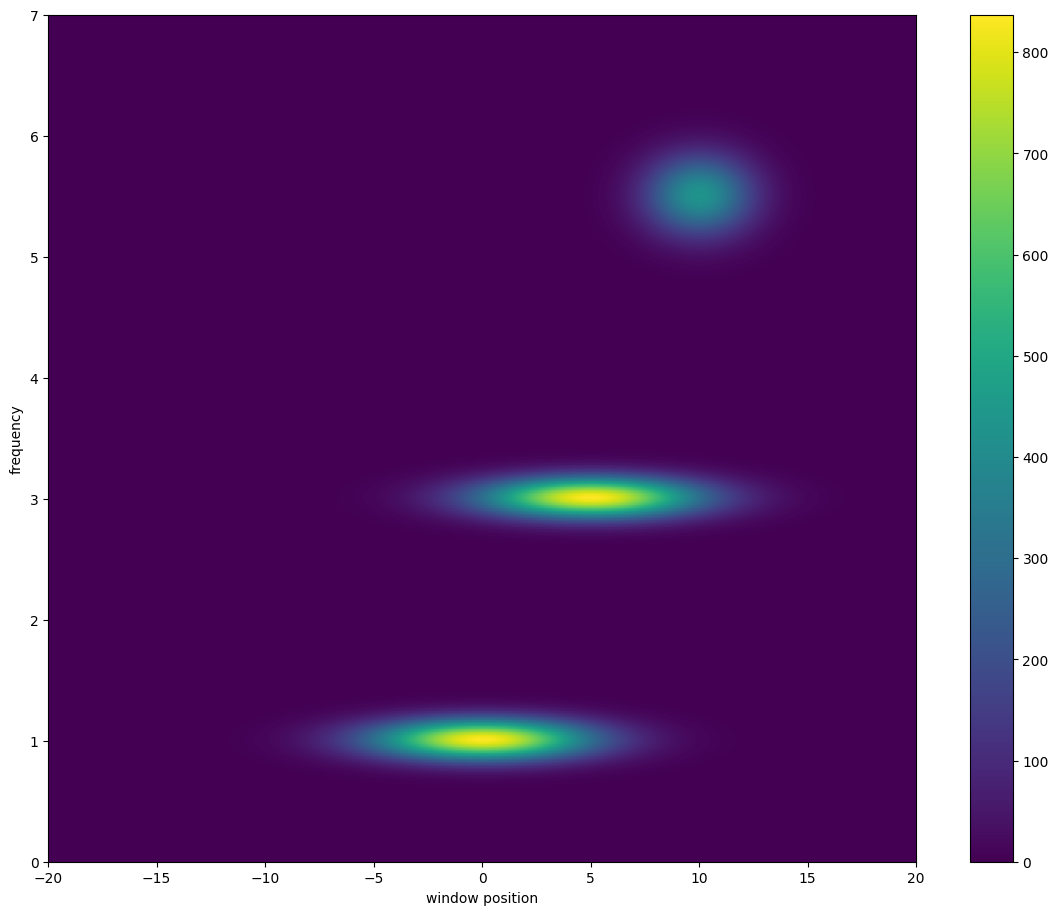

In [62]:
data, dims = get_specgram(t,y)
pic(data, dims)

### 4th wave packet (frequency = 4 and time_shift = 7 cycles). Demonstrating the effect on the plot of the FFT spectrum.

In [63]:
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)

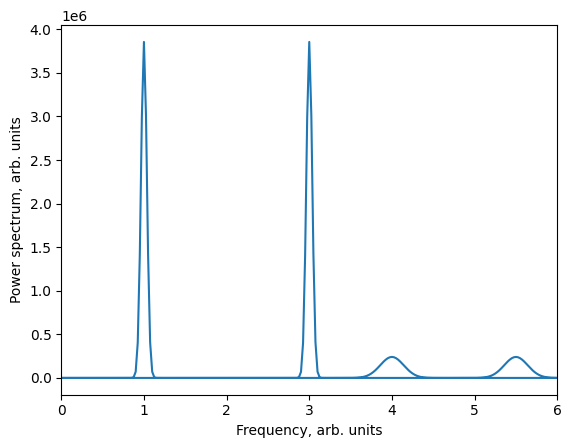

In [64]:
# Fourier spectrum
sp=np.fft.fft(y)
w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plt.plot(w, abs(sp)**2)
plt.xlim(0,6)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units');

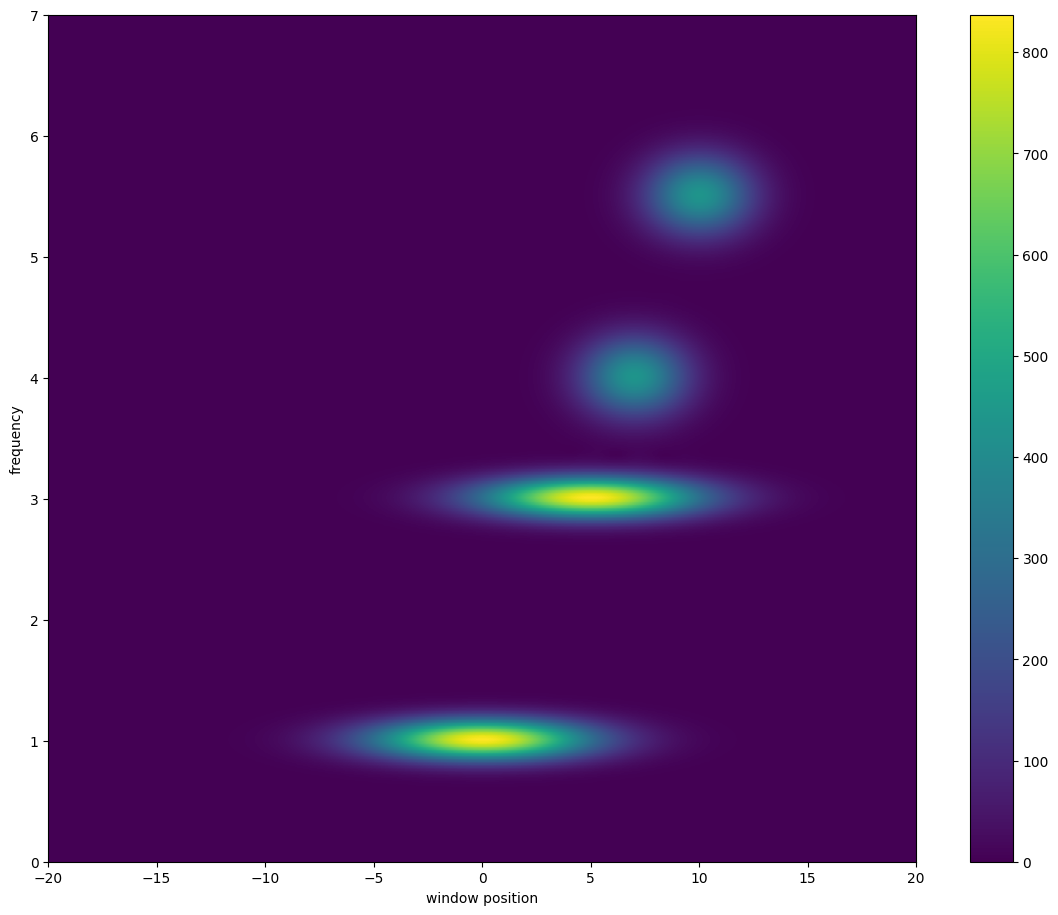

In [65]:
data, dims = get_specgram(t,y)
pic(data, dims)

In [67]:
shift = range(-5,5,1)
N = 3
res = list()

for t in shift:
    t=np.linspace(-20*2*pi, 20*2*pi, 2**14+t)
    
    y=np.sin(t)*exp(-t**2/2/20**2)
    y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
    y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
    y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)
    
    timer = 0
    
    for i in range(N):
        start = timeit.default_timer()
        get_specgram(y, t)
        timer += timeit.default_timer() - start
    res.append(timer/N)
    

Text(0, 0.5, 'time')

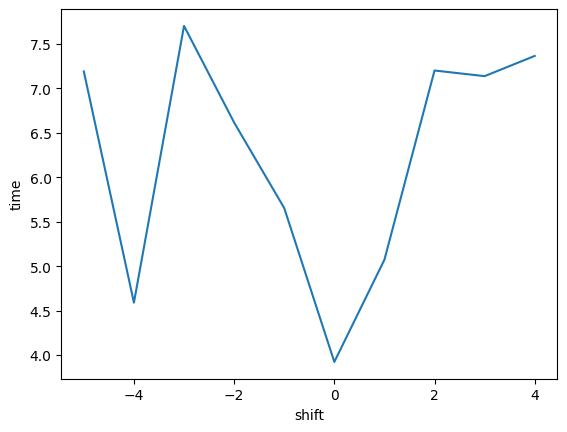

In [69]:
plt.plot(shift,res)
plt.xlabel('shift')
plt.ylabel('time')